In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX 2.csv")
df.head()


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum().sum())

# Drop rows or fill missing values (choose one based on your data)
df.dropna(inplace=True)

Missing Values:
 4


In [ ]:
print(df.columns)


Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
df.columns = df.columns.str.strip()  # Remove spaces from column names


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
print(df.columns)  # Should now show clean column names
print(df.head())  # Verify data after preprocessing


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
print(df.isnull().sum().sum())  # Total missing values in dataset


0


In [ ]:
print(df.info())  # Check data types
print(df.describe())  # Summary of dataset after preprocessing


<class 'pandas.core.frame.DataFrame'>
Index: 225741 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Flow ID                      225741 non-null  object        
 1   Source IP                    225741 non-null  object        
 2   Source Port                  225741 non-null  int64         
 3   Destination IP               225741 non-null  object        
 4   Destination Port             225741 non-null  int64         
 5   Protocol                     225741 non-null  int64         
 6   Timestamp                    225741 non-null  datetime64[ns]
 7   Flow Duration                225741 non-null  int64         
 8   Total Fwd Packets            225741 non-null  int64         
 9   Total Backward Packets       225741 non-null  int64         
 10  Total Length of Fwd Packets  225741 non-null  int64         
 11  Total Length of Bwd Packets  22

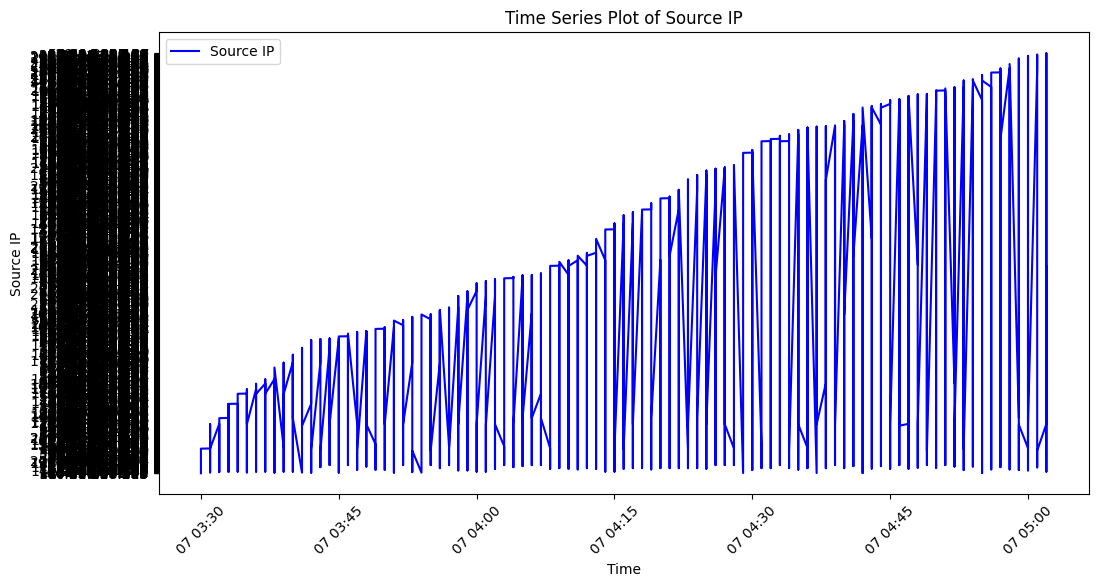

In [ ]:
import matplotlib.pyplot as plt

# Select a column to visualize
feature = 'Source IP'  # Change this to other columns as needed

plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df[feature], label=feature, color='blue')
plt.xlabel("Time")
plt.ylabel(feature)
plt.title(f"Time Series Plot of {feature}")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by 5-minute intervals and count unique Source IPs
df_grouped = df.resample('5T', on='Timestamp')['Source IP'].nunique().reset_index()

# Rename columns for clarity
df_grouped.columns = ['Timestamp', 'Unique IPs']

# Display the first few rows
print(df_grouped.head())


            Timestamp  Unique IPs
0 2017-07-07 03:30:00         392
1 2017-07-07 03:35:00         272
2 2017-07-07 03:40:00         216
3 2017-07-07 03:45:00          96
4 2017-07-07 03:50:00         127


<ipython-input-18-4ac32c9b6c7a>:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_grouped = df.resample('5T', on='Timestamp')['Source IP'].nunique().reset_index()


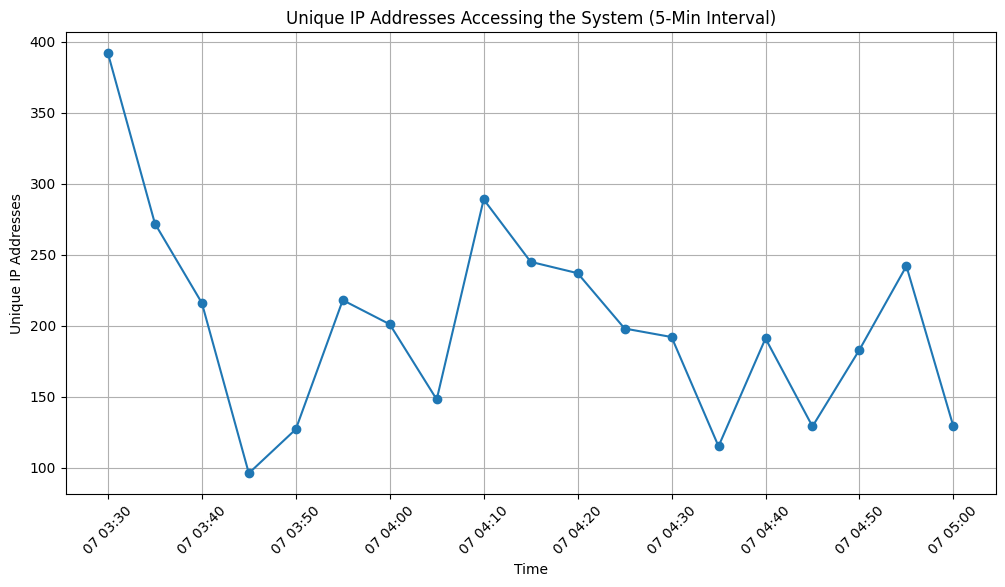

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Timestamp'], df_grouped['Unique IPs'], marker='o', linestyle='-')
plt.xlabel("Time")
plt.ylabel("Unique IP Addresses")
plt.title("Unique IP Addresses Accessing the System (5-Min Interval)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
ip_counts = df['Source IP'].value_counts().reset_index()
ip_counts.columns = ['Source IP', 'Request Count']

# Display the top 10 most frequent IPs
print(ip_counts.head(10))


       Source IP  Request Count
0     172.16.0.1         128181
1  192.168.10.50          32895
2  192.168.10.15           9278
3  192.168.10.12           9216
4   192.168.10.3           8692
5   192.168.10.5           5884
6   192.168.10.9           5107
7  192.168.10.16           4571
8  192.168.10.14           3947
9  192.168.10.17           3297


<ipython-input-21-cf07e946da6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ip_counts['Source IP'][:10], y=ip_counts['Request Count'][:10], palette="viridis")


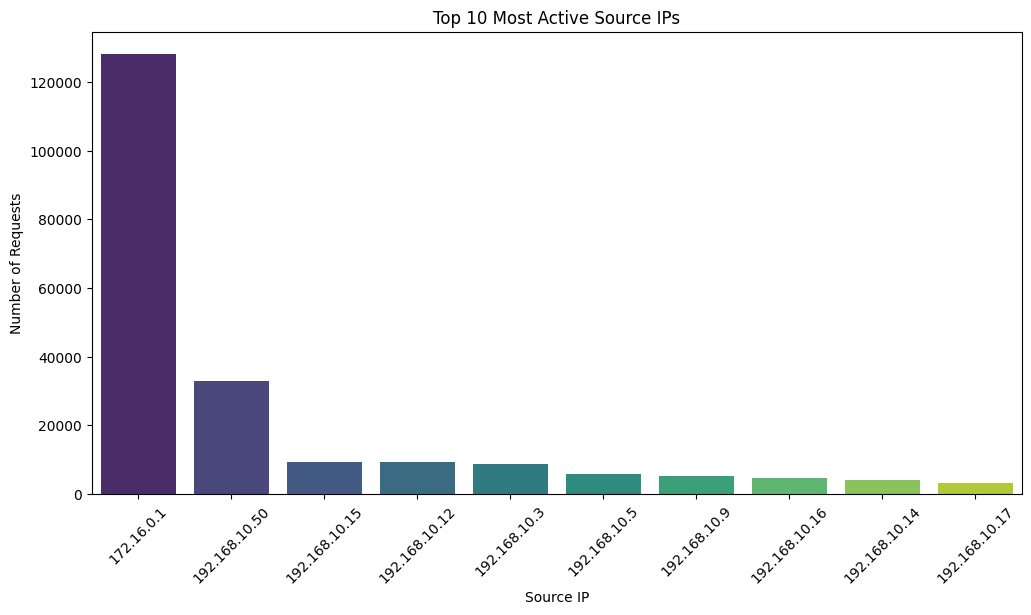

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=ip_counts['Source IP'][:10], y=ip_counts['Request Count'][:10], palette="viridis")
plt.xlabel("Source IP")
plt.ylabel("Number of Requests")
plt.title("Top 10 Most Active Source IPs")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate statistical thresholds
threshold = ip_counts['Request Count'].quantile(0.95)  # Top 5% as suspicious
suspicious_ips = ip_counts[ip_counts['Request Count'] > threshold]

print(f"Number of Suspicious IPs: {len(suspicious_ips)}")
print(suspicious_ips)


Number of Suspicious IPs: 103
           Source IP  Request Count
0         172.16.0.1         128181
1      192.168.10.50          32895
2      192.168.10.15           9278
3      192.168.10.12           9216
4       192.168.10.3           8692
..               ...            ...
98    119.205.194.17             14
99   192.229.173.213             14
100       23.4.59.27             14
101     52.84.145.42             14
102    185.54.150.20             14

[103 rows x 2 columns]


In [ ]:
# Group by 5-minute intervals and count occurrences of each label
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure datetime format

df_grouped = df.resample('5T', on='Timestamp')['Label'].value_counts().unstack().fillna(0)

# Rename columns for clarity
df_grouped.columns = ['Benign Count', 'Attack Count'] if 'BENIGN' in df_grouped.columns else ['Attack Count']

# Display first few rows
print(df_grouped.head())


                     Benign Count  Attack Count
Timestamp                                      
2017-07-07 03:30:00        6294.0           0.0
2017-07-07 03:35:00        3864.0           0.0
2017-07-07 03:40:00        3495.0           0.0
2017-07-07 03:45:00        1905.0           0.0
2017-07-07 03:50:00        2707.0           0.0


<ipython-input-23-956b088cea71>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_grouped = df.resample('5T', on='Timestamp')['Label'].value_counts().unstack().fillna(0)


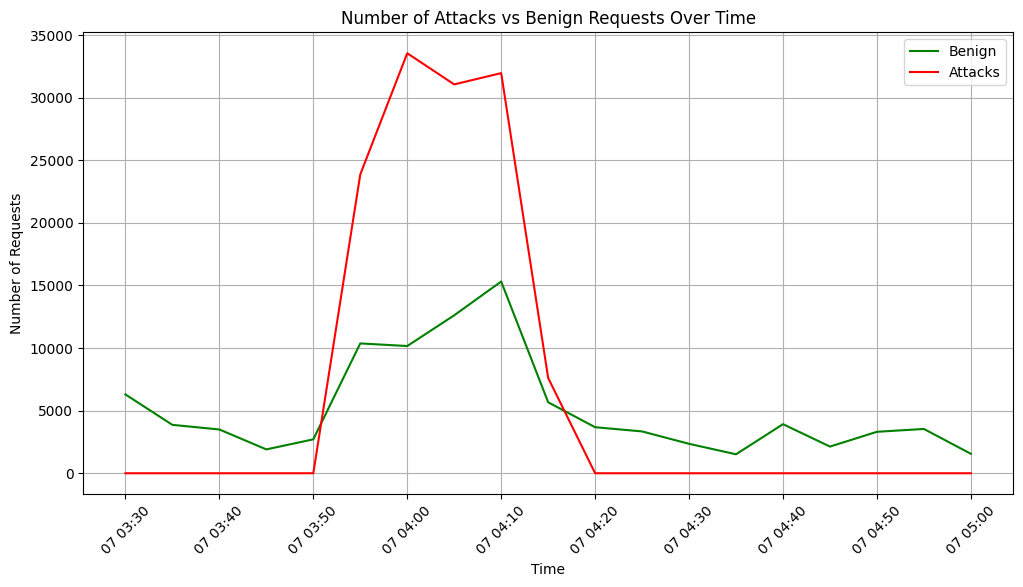

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_grouped.index, df_grouped['Benign Count'], label="Benign", color='green')
plt.plot(df_grouped.index, df_grouped['Attack Count'], label="Attacks", color='red')

plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.title("Number of Attacks vs Benign Requests Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


Label
DDoS      128027
BENIGN     97714
Name: count, dtype: int64


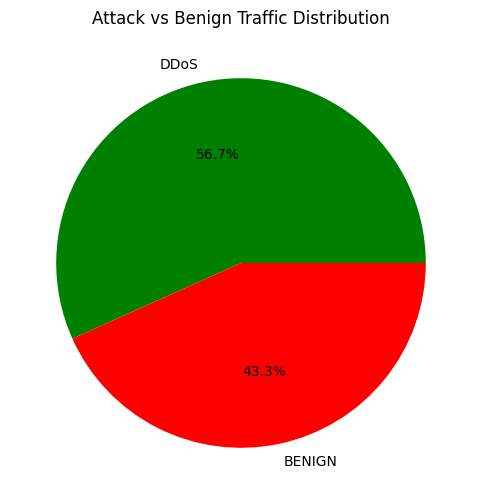

In [ ]:
# Overall distribution of labels
print(df['Label'].value_counts())

# Pie chart to visualize the ratio
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'], figsize=(6, 6))
plt.title("Attack vs Benign Traffic Distribution")
plt.ylabel("")
plt.show()
